In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split

In [2]:
max_features = 5000  # 단어 사전 : 사용할 단어의 최대 개수 (Baby, Panda..)
max_len = 250  # 패딩할 시퀀스의 최대 길이 (비어있는 부분을 0으로 채워줌)


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [4]:
# 3. 훈련셋을 다시 훈련 데이터와 검증 데이터로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
from re import X
# 2. 데이터 전처리 (패딩 적용)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
X_valid = pad_sequences(X_valid, maxlen=max_len)

print(f'첫 번째 리뷰의 패딩 후 데이터: {X_train[0]}')

첫 번째 리뷰의 패딩 후 데이터: [ 141   17   14   31  127   12   60   28 1360 1107   66   45    6   20
   15  497    8   79   17  491    8  112    6    2   20   17  614  691
    4  436   20    9 2855    6  762    7  493    2    6  185  250   24
   55 2276    5   23  350    7   15   82   24   15  821   66   10   10
   45  578   15    4   20  805    8   30   17  821    5 1621   17  614
  190    4   20    9   43   32   99 1214   18   15    8  157   46   17
 1436    4    2    5    2    9   32 1796    5 1214  267   17   73   17
 4413   36   26  400   43 4562   83    4 1873  247   74   83    4  250
  540   82    4   96    4  250    2    8   32    4    2    9  184 3966
   13  384   48   14   16  147 1348   59   62   69    2   12   46   50
    9   53    2   74 1930   11   14   31  151   10   10    4   20    9
  540  364  352    5   45    6    2  589   33  269    8 2715  142 1621
    5  821   17   73   17  204    5 2908   19   55 1763 4697   92   66
  104   14   20   93   76 1488  151   33    4   58   12  1

In [6]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(20000, 250)
(25000, 250)
(5000, 250)


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [8]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow.keras import layers, models
import keras


# 4. RNN 모델 구성
model_rnn = Sequential([
    Embedding(input_dim=max_features, output_dim=32, input_length=max_len),  # 임베딩 레이어
    SimpleRNN(32),  # RNN 레이어
    Dropout(0.2),  # 드롭아웃 레이어 추가
    Dense(1, activation='sigmoid')  # 출력층 (이진 분류)
])

# 5. 모델 컴파일 (RMSprop 옵티마이저 사용)
rmsprop_rnn = RMSprop(learning_rate=1e-4)
model_rnn.compile(optimizer=rmsprop_rnn,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_rnn.build(input_shape=(None, max_len))

# 모델 요약
model_rnn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 250, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,113 (633.25 KB)

 Trainable params: 162,113 (633.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 모델 학습
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=64)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.5153 - loss: 0.6942 - val_accuracy: 0.5670 - val_loss: 0.6836
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.6180 - loss: 0.6655 - val_accuracy: 0.7650 - val_loss: 0.5920
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.7729 - loss: 0.5576 - val_accuracy: 0.7982 - val_loss: 0.4939
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8306 - loss: 0.4606 - val_accuracy: 0.8200 - val_loss: 0.4386
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8528 - loss: 0.3930 - val_accuracy: 0.8414 - val_loss: 0.3941
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8679 - loss: 0.3550 - val_accuracy: 0.8530 - val_loss: 0.3697
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8822 - loss: 0.3199 - val_accuracy: 0.8488 - val_loss: 0.3695
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.8912 - loss: 0.3016 - 

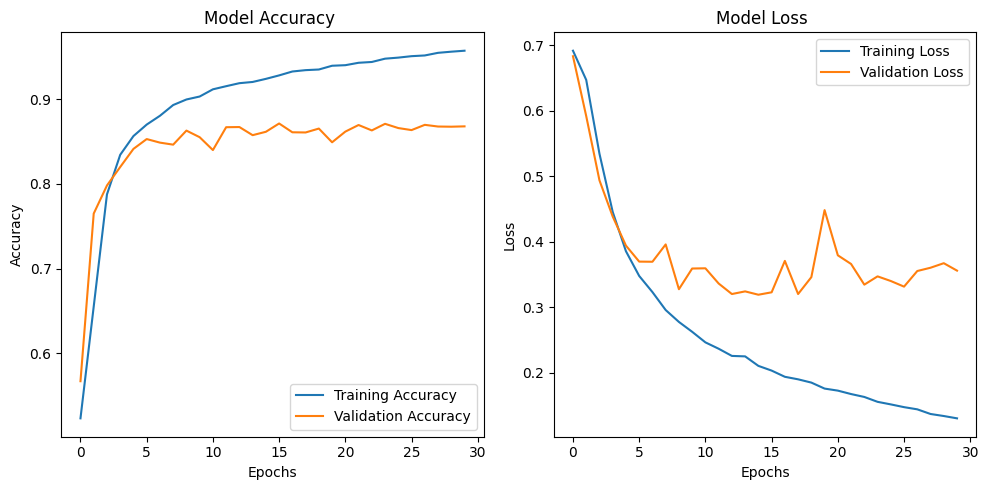

In [10]:
import matplotlib.pyplot as plt

# 1. 정확도 그래프 (Accuracy)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1행 2열의 두 번째 서브플롯
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
  # y축 반전


# 2. 손실 그래프 (Loss)
plt.subplot(1, 2, 2)  # 1행 2열의 첫 번째 서브플롯
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 # y축 반전


plt.tight_layout()  # 레이아웃 조정
plt.show()


In [12]:
from keras.layers import LSTM

model_lstm = Sequential([
            Embedding(input_dim=max_features, output_dim=32, input_length=max_len),  # 임베딩 레이어
            LSTM(32),  # LSTM 레이어
            Dropout(0.2),  # 드롭아웃 레이어 추가
            Dense(1, activation='sigmoid')  # 출력층 (이진 분류)
])
# 5. 모델 컴파일 (RMSprop 옵티마이저 사용)
rmsprop_lstm = RMSprop(learning_rate=1e-4)
model_lstm.compile(optimizer=rmsprop_lstm,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 모델 학습
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=64)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5175 - loss: 0.6927 - val_accuracy: 0.5782 - val_loss: 0.6916
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5908 - loss: 0.6907 - val_accuracy: 0.6428 - val_loss: 0.6855
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6707 - loss: 0.6607 - val_accuracy: 0.7108 - val_loss: 0.5613
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7679 - loss: 0.5214 - val_accuracy: 0.8232 - val_loss: 0.4491
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8326 - loss: 0.4226 - val_accuracy: 0.8470 - val_loss: 0.3879
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8681 - loss: 0.3529 - val_accuracy: 0.8654 - val_loss: 0.3403
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8835 - loss: 0.3153 - val_accuracy: 0.8666 - val_loss: 0.3229
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8939 - loss: 0.2889 - val_acc

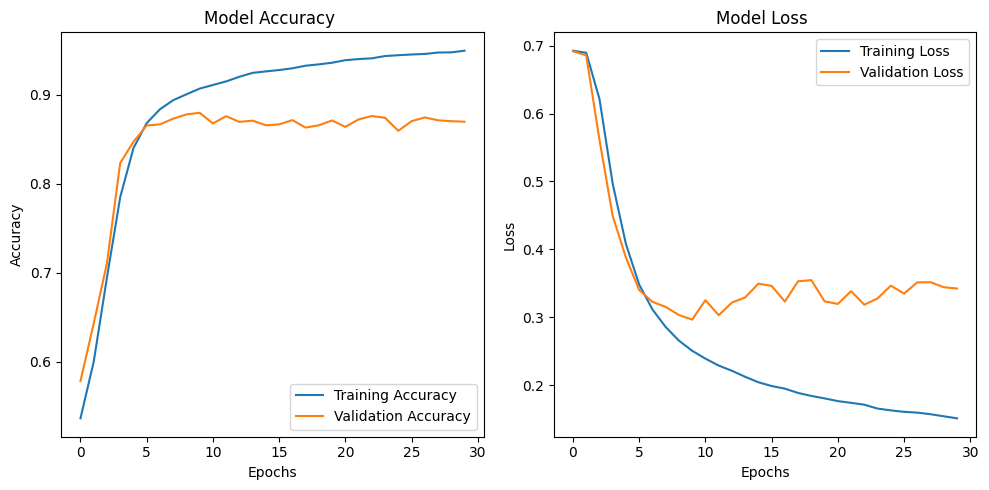

In [14]:
import matplotlib.pyplot as plt

# 1. 정확도 그래프 (Accuracy)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1행 2열의 두 번째 서브플롯
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
  # y축 반전


# 2. 손실 그래프 (Loss)
plt.subplot(1, 2, 2)  # 1행 2열의 첫 번째 서브플롯
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 # y축 반전


plt.tight_layout()  # 레이아웃 조정
plt.show()


In [15]:
from keras.layers import GRU

model_gru = Sequential([
    Embedding(input_dim=max_features, output_dim=32, input_length=max_len),  # 임베딩 레이어
    GRU(32), # GRU 레이어
    Dropout(0.2),  # 드롭아웃 레이어 추가
    Dense(1, activation='sigmoid')
])  # 출력층 (이진 분류)

rmsprop_gru = RMSprop(learning_rate=1e-4)
model_gru.compile(optimizer=rmsprop_gru,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 모델 학습
history_gru = model_gru.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=64)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5257 - loss: 0.6926 - val_accuracy: 0.5664 - val_loss: 0.6913
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5870 - loss: 0.6899 - val_accuracy: 0.5916 - val_loss: 0.6873
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6187 - loss: 0.6838 - val_accuracy: 0.6168 - val_loss: 0.6759
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6547 - loss: 0.6650 - val_accuracy: 0.6866 - val_loss: 0.6221
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7400 - loss: 0.5490 - val_accuracy: 0.8134 - val_loss: 0.4237
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8176 - loss: 0.4104 - val_accuracy: 0.8476 - val_loss: 0.3613
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8513 - loss: 0.3502 - val_accuracy: 0.8634 - val_loss: 0.3346
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8812 - loss: 0.2981 - val_accu

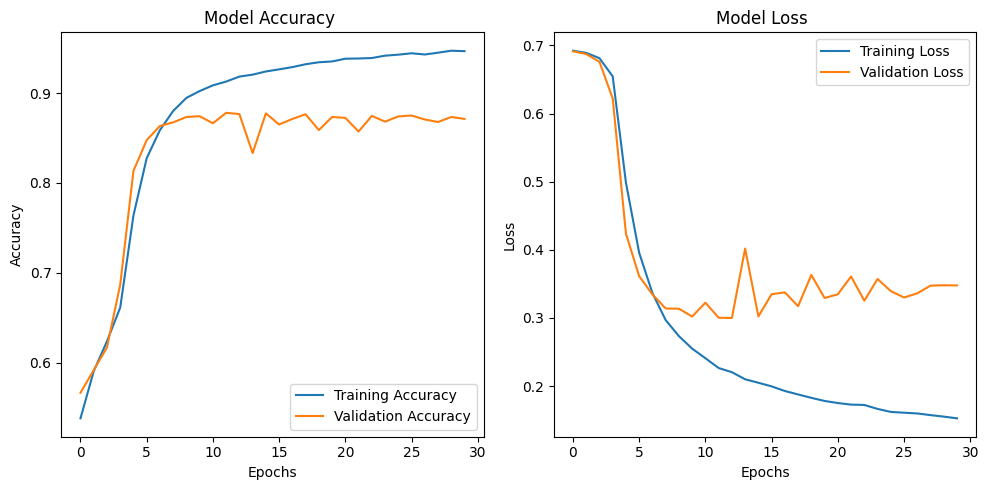

In [17]:
import matplotlib.pyplot as plt

# 1. 정확도 그래프 (Accuracy)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1행 2열의 두 번째 서브플롯
plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
  # y축 반전


# 2. 손실 그래프 (Loss)
plt.subplot(1, 2, 2)  # 1행 2열의 첫 번째 서브플롯
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Model Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 # y축 반전


plt.tight_layout()  # 레이아웃 조정
plt.show()


In [18]:
# RNN 모델 평가
rnn_score = model_rnn.evaluate(X_test, y_test)
print(f'RNN Test Accuracy: {rnn_score[1]}')

# LSTM 모델 평가
lstm_score = model_lstm.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy: {lstm_score[1]}')

# GRU 모델 평가
gru_score = model_gru.evaluate(X_test, y_test)
print(f'GRU Test Accuracy: {gru_score[1]}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8571 - loss: 0.3725
RNN Test Accuracy: 0.8587599992752075
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8619 - loss: 0.3626
LSTM Test Accuracy: 0.8616399765014648
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8635 - loss: 0.3624
GRU Test Accuracy: 0.864799976348877


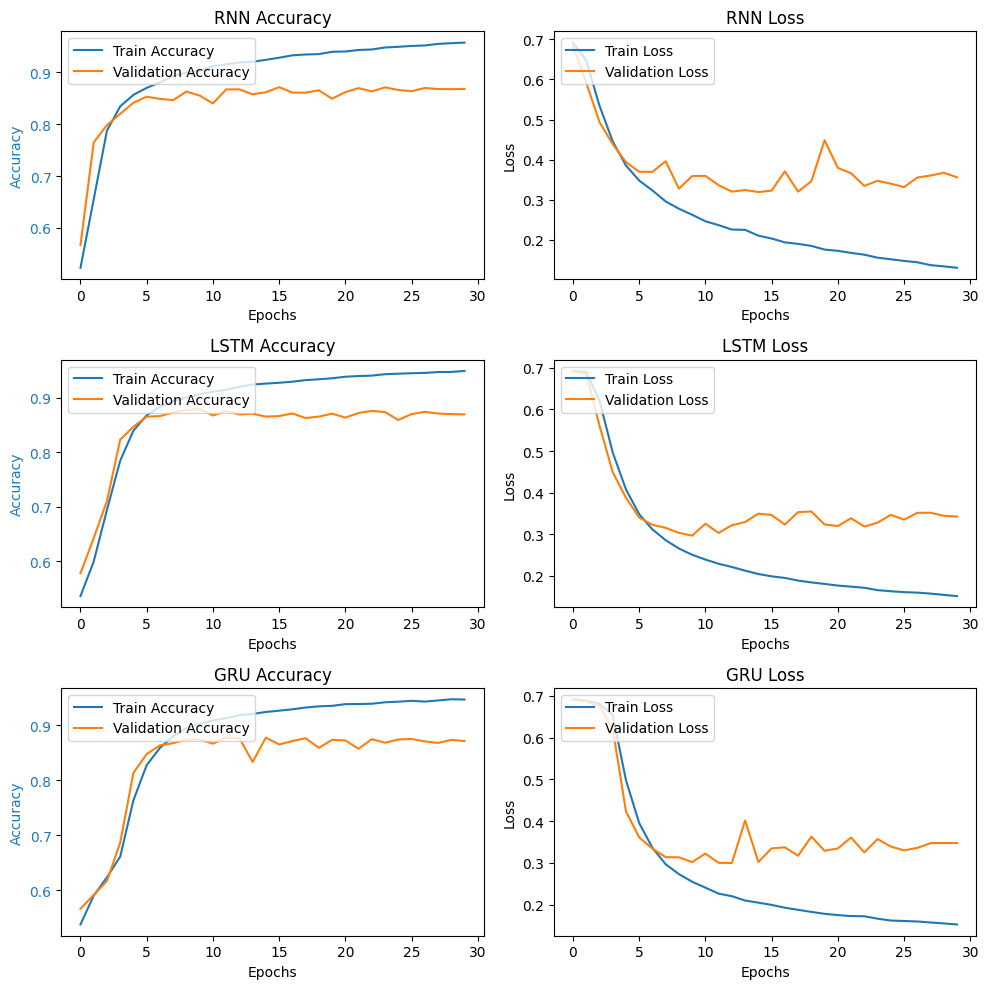

In [19]:
import matplotlib.pyplot as plt

def plot_history(history, model_name, ax1, ax2):
    # 첫 번째 축에 정확도 그리기 (Train, Validation)
    ax1.plot(history.history['accuracy'], label='Train Accuracy', color='tab:blue')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='tab:orange')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    ax1.set_title(f'{model_name} Accuracy')

    # 두 번째 축에 손실 그리기 (Train, Validation)
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.tick_params(axis='y')
    ax2.legend(loc='upper left')
    ax2.set_title(f'{model_name} Loss')

# 서브플롯을 사용해 2행 3열의 그래프 생성
fig, axes = plt.subplots(3, 2, figsize=(10, 10))  # 2행 3열의 그래프 생성

# 첫 번째 행: RNN
plot_history(history_rnn, 'RNN', axes[0, 0], axes[0, 1])

# 두 번째 행: LSTM
plot_history(history_lstm, 'LSTM', axes[1, 0], axes[1, 1])

# 세 번째 행: GRU
plot_history(history_gru, 'GRU', axes[2, 0], axes[2, 1])

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [38]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# IMDb 데이터셋에서 단어 인덱스 로드
word_index = imdb.get_word_index()

# IMDb 데이터셋에 사용한 단어 인덱스를 기반으로 토크나이저 만들기
tokenizer = Tokenizer(num_words=max_features)
tokenizer.word_index = word_index


# 샘플 리뷰들
test_reviews = [
    "This movie was fantastic! The story was gripping and the acting was top-notch.",
    "I did not enjoy the film. The plot was dull and the characters were uninteresting.",
    "지루할 줄 알았는데 너무 재밌었다",
    "Good movie",
    "Sad ending"
]

# 텍스트를 토큰화
test_sequences = tokenizer.texts_to_sequences(test_reviews)

# 시퀀스 길이를 학습 데이터와 맞추기 위해 패딩 적용
test_sequences_pad = pad_sequences(test_sequences, maxlen=max_len)

# 모델을 사용하여 감성 예측 (0: 부정적, 1: 긍정적)
rnn_predictions = model_rnn.predict(test_sequences_pad)
lstm_predictions = model_lstm.predict(test_sequences_pad)
gru_predictions = model_gru.predict(test_sequences_pad)

# 예측 결과 출력
for i, review in enumerate(test_reviews):
    print(f"Review: {review}")
    print(f"RNN Prediction: {'Positive' if rnn_predictions[i] > 0.5 else 'Negative'}")
    print(f"LSTM Prediction: {'Positive' if lstm_predictions[i] > 0.5 else 'Negative'}")
    print(f"GRU Prediction: {'Positive' if gru_predictions[i] > 0.5 else 'Negative'}")
    print("\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Review: This movie was fantastic! The story was gripping and the acting was top-notch.
RNN Prediction: Positive
LSTM Prediction: Positive
GRU Prediction: Positive


Review: I did not enjoy the film. The plot was dull and the characters were uninteresting.
RNN Prediction: Positive
LSTM Prediction: Negative
GRU Prediction: Negative


Review: 지루할 줄 알았는데 너무 재밌었다
RNN Prediction: Negative
LSTM Prediction: Positive
GRU Prediction: Positive


Review: Good movie
RNN Prediction: Negative
LSTM Prediction: Positive
GRU Prediction: Positive


Review: Sad ending
RNN Prediction: Negative
LSTM Prediction: Negative
GRU Prediction: Negative


